[TOC]

# 计算机视觉第二次作业

相关信息：

- 姓名：胡中林

- 学号：16337085

- 专业：16级智能科学与技术

- 课程：计算机视觉

- 日期：18.09.10

作业要求：

> Use your mobile to take two photos of an arbitrary object. Design a program to find as many as matched feature points in these two photos. Briefly compare and analyze different feather detectors you have used. 

备注：这份作业借助了jupyter notebook这款工具

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import copy
import time
# %matplotlib inline
# %matplotlib notebook

In [2]:
img1 = np.array(PIL.Image.open("C:\\Users\\Administrator\\Downloads\\HW\\18.09.09\\k1.jpg"))
img2 = np.array(PIL.Image.open("C:\\Users\\Administrator\\Downloads\\HW\\18.09.09\\k2.jpg"))

Feature2D.ORB method tooks 00:00:00 and found 235 matching points



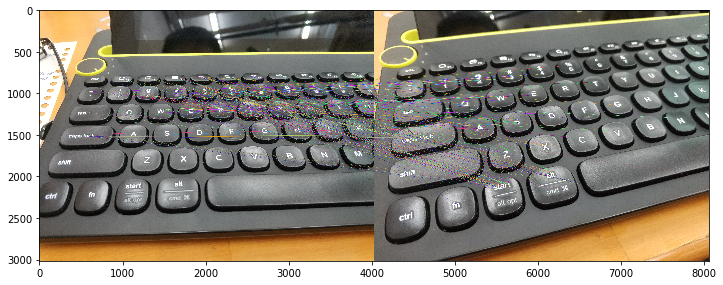

Feature2D.AKAZE method tooks 00:00:04 and found 5046 matching points



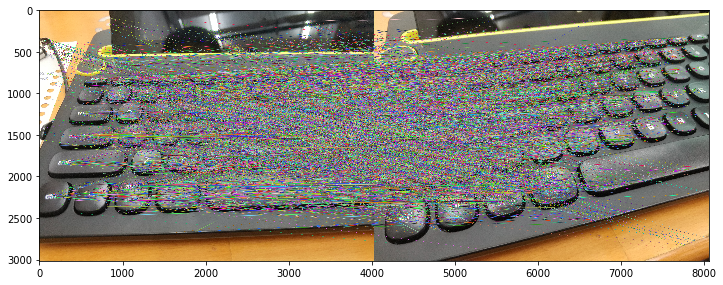

Feature2D.BRISK method tooks 00:00:01 and found 4008 matching points



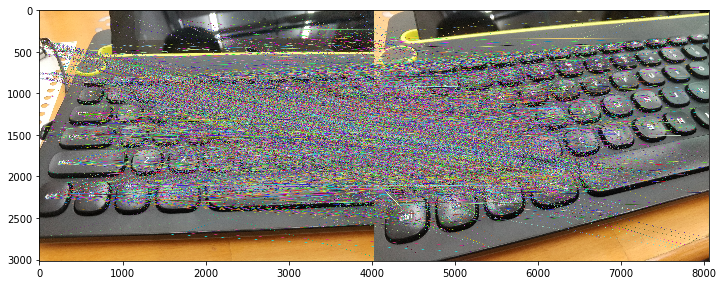

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\features2d\src\feature2d.cpp:154: error: (-213:The function/feature is not implemented)  in function 'cv::Feature2D::detectAndCompute'


In [4]:
detector_list = [cv2.ORB_create(), cv2.AKAZE_create(), cv2.BRISK_create(), cv2.MSER_create()]

for i, detector in enumerate(detector_list):
    start_time = time.time()
    
    kp1, des1 = detector.detectAndCompute(img1,None)
    kp2, des2 = detector.detectAndCompute(img2,None)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    matches_img = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)

    print(detector.getDefaultName(), 'method', time.strftime('tooks %H:%M:%S', time.gmtime(time.time() - start_time)), 'and found',len(matches), 'matching points')
    print()
    img_size = 12
    plt.figure(figsize=(img_size, img_size))
    plt.imshow(matches_img)
    plt.show()

# Reference

- https://docs.opencv.org/3.4.1/d1/d89/tutorial_py_orb.html
- https://docs.opencv.org/3.4.1/dc/d16/tutorial_akaze_tracking.html
- https://docs.opencv.org/3.4.1/db/d70/tutorial_akaze_matching.html
- https://www.programcreek.com/python/example/89346/cv2.getGaussianKernel
- https://stackoverflow.com/questions/29589119/plot-width-settings-in-ipython-notebook